In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

# y = 4x + 6 식을 근사(w1=4, w0=6). random값은 Noise를 위해 만듦
X = 2*np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100,1)

In [2]:
print(len(X))
X

100


array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [3]:
print(len(y))
y

100


array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059],
       [13.06304208],
       [10.67947726],
       [12.95425917],
       [12.63854946],
       [10.12198388],
       [11.93062336],
       [11.45360443],
       [10.75263147],
       [14.38141214],
       [ 6.92465486],
       [ 7.40360757],
       [ 6.1722472 ],
       [14.44682926],
       [12.3521661 ],
       [13.36208655],
       [15.71209743],
       [11.04550945],
       [ 8.4213499 ],
       [13.21363012],
       [ 5.773072  ],
       [13.06298936],
       [ 6.73320732],
       [12.80989652],
       [12.0977286 ],
       [10.79781031],
       [ 9.98400386],
       [13.09991417],
       [ 8.78797697],
       [12.45753654],
       [ 5.88231503],
       [11.74354037],
       [11.84401775],
       [10.78046188],
       [14.164064  ],
       [12.37676906],
       [ 9.25248874],
       [ 8.39685484],
       [11.87928774],
       [ 7.80818967],
       [10.63956586],
       [11

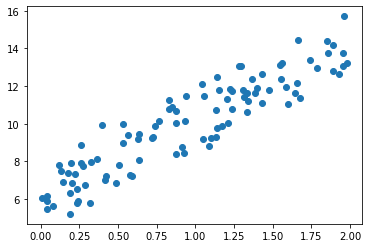

In [4]:
#  X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [8]:
# W1과 W0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update




In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_Steps(X, y, iters=10000):
    #w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()호출하여 w1, w0업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        print(w1, w0)
    return w1, w0

In [11]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N #오차값
    return cost

w1, w0 = gradient_descent_Steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X +w0
print('GDTC:{0:.4f}'.format(get_cost(y, y_pred)))

[[0.21502681]] [[0.1994937]]
[[0.42100578]] [[0.39093099]]
[[0.61831123]] [[0.57464412]]
[[0.80730201]] [[0.75095159]]
[[0.98832217]] [[0.92015876]]
[[1.1617015]] [[1.08255838]]
[[1.32775621]] [[1.2384311]]
[[1.48678941]] [[1.38804598]]
[[1.6390917]] [[1.53166097]]
[[1.78494168]] [[1.66952335]]
[[1.92460643]] [[1.80187021]]
[[2.05834199]] [[1.92892882]]
[[2.18639383]] [[2.05091709]]
[[2.30899728]] [[2.16804391]]
[[2.42637792]] [[2.28050955]]
[[2.53875204]] [[2.38850599]]
[[2.64632698]] [[2.49221732]]
[[2.74930151]] [[2.59181999]]
[[2.8478662]] [[2.68748318]]
[[2.94220372]] [[2.77936908]]
[[3.03248922]] [[2.86763316]]
[[3.11889059]] [[2.95242451]]
[[3.2015688]] [[3.03388603]]
[[3.28067816]] [[3.11215473]]
[[3.35636659]] [[3.18736196]]
[[3.42877592]] [[3.25963365]]
[[3.49804211]] [[3.32909051]]
[[3.56429551]] [[3.39584829]]
[[3.62766106]] [[3.46001795]]
[[3.68825855]] [[3.52170586]]
[[3.74620283]] [[3.58101401]]
[[3.801604]] [[3.63804016]]
[[3.85456759]] [[3.69287806]]
[[3.90519478]] [[3

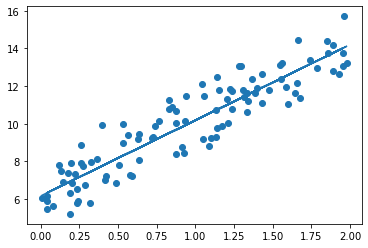

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred)